## YBCO overdoped sample - analysis of 19/06 measurments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitutils as ft
import scipy.optimize as opt
import fitutils as ft
import tools
import schottky_analysis as sch
import constants as cnt

import linear_acoustic_fit
import nonlinear_acoustic_fit
import nonlinear_optic_fit
import polynomial_optic_fit
import debye_integration as db

### Non linear fit, Debye model

Fitting the data considering the theorical model $\gamma + \beta x + Cs(x) = y(x)$, with $y = C/T$ and $x = T^2$

Between 0 and 12 K : good agreements with the data, optimizd paramters : Beta, Gamma, n, E =  0.7507, 3.077, 0.0121, 7.9315e-23. The corresponding Debye temperature is $322.87 K$

Between 0 and 20 K : visually less good agreement with the experimental data : Beta, Gamma, n, E =  0.8488, 0.2344, 0.00128, 7.497e-23
But the gamma become near 0 (less than 1e-2)

Important sensibility to the E parameter -> better to substract the Schottky anomaly

Beta, Gamma, n, E :  0.7495315170052517 3.19829739454261 0.0012118893327018793 7.897027012749528e-23


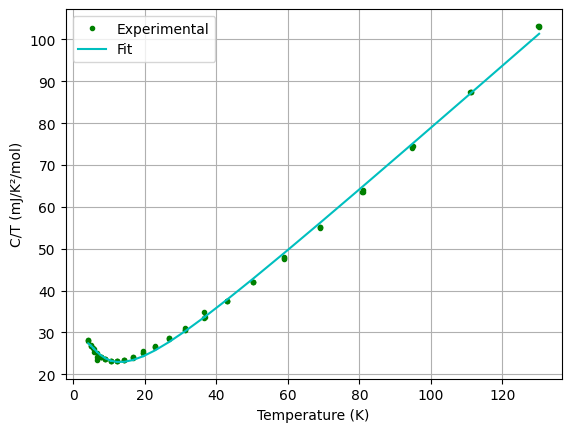

Beta, Gamma, n, E :  0.848534757508169 0.2344136468818058 0.0012855140803287948 7.497471094190909e-23


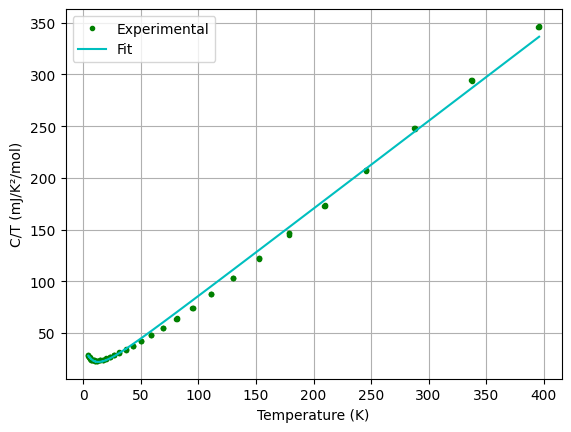

In [3]:
nonlinear_acoustic_fit.plot_fit_acoustic(0, 144, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS,
                                         bounds=([0.3, 0, 1e-3, 2e-23],[1, 10,5e-2, 8e-23]))

nonlinear_acoustic_fit.plot_fit_acoustic(0, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS,
                                         bounds=([0.1, 0, 1e-3, 2e-23],[1, 10,5e-2, 9e-23]))

### Linear fit, Debye model

Optimizing the experimental data from 100 $K^2$ to 400 $K^2$, where the curve seems to be linear and the schottky anomaly tend to 0, according to the Debye model : $y(x) = \beta x + \gamma $

The values really deviate from the expected ones, the gamma cannot be less than 0.

<Figure size 640x480 with 0 Axes>

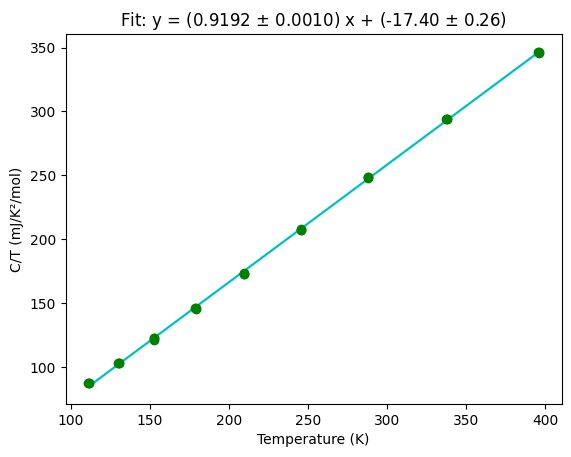

array([ 9.19209521e-01, -1.73997283e+01,  1.03975702e-03,  2.61480738e-01])

In [18]:
linear_acoustic_fit.linear_fit(100, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
                               cnt.err_squared_temperature_ISIS,cnt.err_hc_div_temp_ISIS)

### Non linear fit, Debye + Einstein model

Fitting the experimental data to the Debye model with a quadratic contribution in temperature, simulating possible optical modes. Optimizong the paramters of the numercial model $y(x) = \beta x + \gamma + \alpha x^2 + Cs(x)$

Between 0 and 20 K :

$\beta = 0.7376 mJ/K^4/mol$, donc $T_D = 324.77 K$ et $\gamma = 2.315 mJ/mol/K^2$

Beta, Gamma, n, E, nu :  0.7376897511439015 2.3153318358065142 0.0012503949456411333 7.89999999999835e-23 0.00035518475286629245


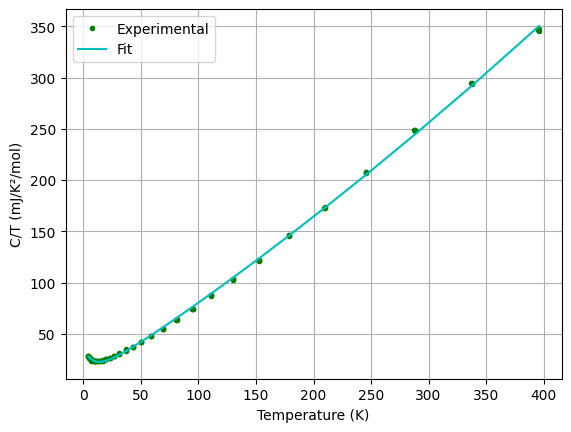

In [4]:
nonlinear_optic_fit.plot_fit_optic(0, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS, 
                                   bounds = ([0.2, 0, 1e-5, 5e-23, 0],[1, 10, 5e-2, 7.9e-23, 1]))

### Polynomial fit, Einstein model

Fitting the data after 100 $K^2$, so the Schottky contribution can be neglected

$T_D = 320.65 K$

Beta, Gamma, alpha :  0.7664368604562725 2.3057657506964115e-17 0.0002930042218719286


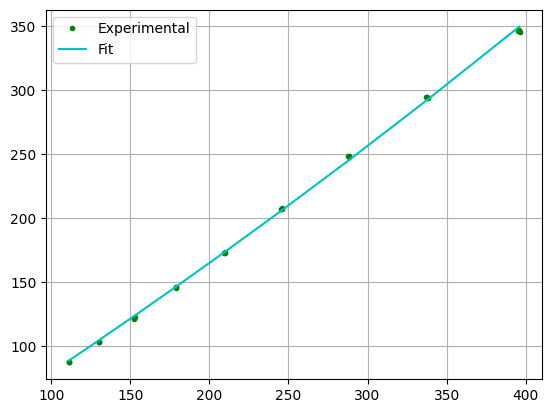

In [5]:
polynomial_optic_fit.plot_fit_quadra(100, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
                                     bounds = ([0, 0, 0],[1, 10, 1]))